<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/C%C3%B3pia_%C3%81rvore_Bin%C3%A1ria_e_AVL__de_Wagner_LopesCardozo_Aula8Pr%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

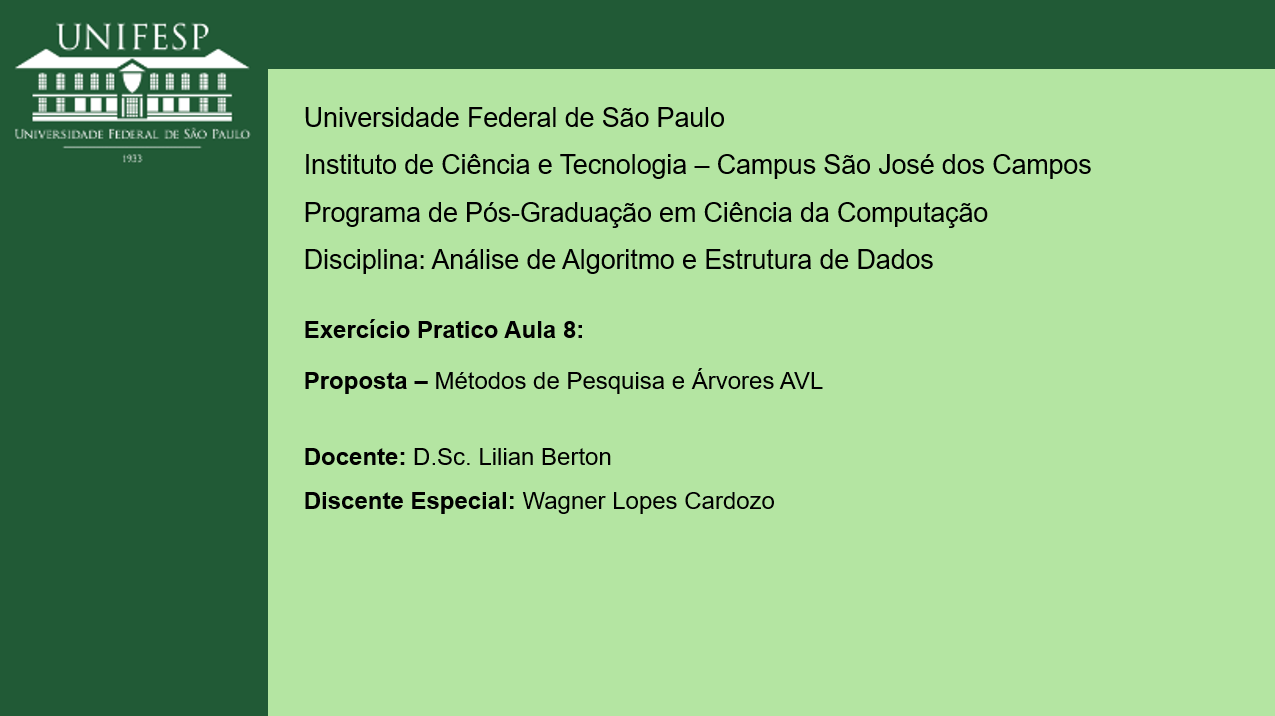

#<font color=lightgreen>Exercício 1

#<font color=lightgreen>1ª Versão Para os Tempos - Calculando os tempos

##Este algoritmo implementa os métodos da estrutura de dados vetor de dados aleatório para busca sequêncial, vetor ordenado para busca binária, árvore binária e árvore AVL. Nestas estruturas de dados o algoritmo gera um vetor aleatório com 100.000 elementos e faz a busca do elemento de valor 50 e o elemento de valor 50.000 e calcula o tempo da busca mesmo não encontrando os elementos.

#<font color=lightgreen>Instalando a biblioteca tabulate do Python para exibição no formato de tabela dos resultados

In [ ]:
!pip install tabulate

#<font color=lightgreen>Implementação Iterativa:

In [ ]:
import time
import numpy as np
from tabulate import tabulate

# Função para criar o vetor com 100.000 elementos aleatórios
def create_random_vector(size=100000):
    return np.sort(np.random.choice(range(1, size + 1), size, replace=False))

# Classe para a Árvore Binária Comum
class BinaryTree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def insert(self, value):
        current = self
        while True:
            if value < current.value:
                if current.left:
                    current = current.left
                else:
                    current.left = BinaryTree(value)
                    break
            else:
                if current.right:
                    current = current.right
                else:
                    current.right = BinaryTree(value)
                    break

    def search(self, value):
        current = self
        while current:
            if value == current.value:
                return True
            elif value < current.value:
                current = current.left
            else:
                current = current.right
        return False

# Classe para a Árvore AVL
class AVLTree(BinaryTree):
    def __init__(self, value):
        super().__init__(value)
        self.height = 1

    def insert(self, value):
        root = self
        stack = []
        while True:
            if value < root.value:
                if root.left:
                    stack.append(root)
                    root = root.left
                else:
                    root.left = AVLTree(value)
                    stack.append(root)
                    break
            else:
                if root.right:
                    stack.append(root)
                    root = root.right
                else:
                    root.right = AVLTree(value)
                    stack.append(root)
                    break

        # Balancear a árvore
        for node in reversed(stack):
            node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))
            balance_factor = self.get_balance(node)

            # Balanceamento
            if balance_factor > 1:
                if self.get_balance(node.left) < 0:
                    node.left = node.left.rotate_left()
                return node.rotate_right()

            elif balance_factor < -1:
                if self.get_balance(node.right) > 0:
                    node.right = node.right.rotate_right()
                return node.rotate_left()

        return self

    def get_height(self, node):
        return node.height if node else 0

    def get_balance(self, node):
        return self.get_height(node.left) - self.get_height(node.right)

    def rotate_left(self):
        new_root = self.right
        self.right = new_root.left
        new_root.left = self
        self.height = 1 + max(self.get_height(self.left), self.get_height(self.right))
        new_root.height = 1 + max(self.get_height(new_root.left), self.get_height(new_root.right))
        return new_root

    def rotate_right(self):
        new_root = self.left
        self.left = new_root.right
        new_root.right = self
        self.height = 1 + max(self.get_height(self.left), self.get_height(self.right))
        new_root.height = 1 + max(self.get_height(new_root.left), self.get_height(new_root.right))
        return new_root

# Função para busca binária em um vetor ordenado
def binary_search(sorted_list, value):
    left, right = 0, len(sorted_list) - 1
    while left <= right:
        mid = (left + right) // 2
        if sorted_list[mid] == value:
            return True
        elif sorted_list[mid] < value:
            left = mid + 1
        else:
            right = mid - 1
    return False

# Criar o vetor aleatório
vector = create_random_vector()

# Medir o tempo de inserção e busca em cada estrutura de dados
timing_results = []

# Busca do elemento 50 e 50.000 em vetor de dados aleatórios
start_time = time.time()
search_50_unsorted = 50 in vector
search_50000_unsorted = 50000 in vector
search_unsorted_time = time.time() - start_time

# Criar vetor ordenado para busca binária
sorted_vector = np.sort(vector)

# Medir o tempo de inserção no vetor ordenado
start_time = time.time()
insert_sorted_time = len(sorted_vector)  # O tempo de inserção é simplesmente a quantidade de elementos, pois já está ordenado
insert_sorted_time = 0  # Como estamos apenas utilizando o vetor já ordenado, não há tempo de inserção.
insert_sorted_time = time.time() - start_time  # Atualizando o tempo

# Busca do elemento 50 e 50.000 em vetor ordenado usando busca binária
start_time = time.time()
search_50_sorted = binary_search(sorted_vector, 50)
search_50000_sorted = binary_search(sorted_vector, 50000)
search_sorted_time = time.time() - start_time

# Inserção na Árvore Binária Comum
start_time = time.time()
binary_tree = BinaryTree(vector[0])
for value in vector[1:]:
    binary_tree.insert(value)
insert_time_binary_tree = time.time() - start_time

# Busca do elemento 50 e 50.000 na Árvore Binária Comum
start_time = time.time()
search_50_binary_tree = binary_tree.search(50)
search_50000_binary_tree = binary_tree.search(50000)
search_binary_tree_time = time.time() - start_time

# Inserção na Árvore AVL
start_time = time.time()
avl_tree = AVLTree(vector[0])
for value in vector[1:]:
    avl_tree = avl_tree.insert(value)
insert_time_avl = time.time() - start_time

# Busca do elemento 50 e 50.000 na Árvore AVL
start_time = time.time()
search_50_avl = avl_tree.search(50)
search_50000_avl = avl_tree.search(50000)
search_avl_time = time.time() - start_time

# Exibir os resultados em formato de tabela
table = [
    ["Vetor de dados aleatórios", "-", search_unsorted_time, search_unsorted_time],
    ["Vetor ordenado (busca binária)", insert_sorted_time, search_sorted_time, search_sorted_time],
    ["Árvore binária", insert_time_binary_tree, search_binary_tree_time, search_binary_tree_time],
    ["Árvore AVL", insert_time_avl, search_avl_time, search_avl_time]
]

headers = ["Estrutura de Dados", "Tempo Inserção dos 100.000 elementos (s)", "Tempo de Busca do Elemento 50 (s) ", "Tempo de busca do Elemento 50.000 (s)"]

print(tabulate(table, headers=headers, tablefmt="grid"))

# Mensagem final
print("Muito Obrigado e Bons Estudos")

+--------------------------------+--------------------------------------------+--------------------------------------+-----------------------------------------+
| Estrutura de Dados             | Tempo Inserção dos 100.000 elementos (s)   |   Tempo de Busca do Elemento 50 (s)  |   Tempo de busca do Elemento 50.000 (s) |
+================================+============================================+======================================+=========================================+
| Vetor de dados aleatórios      | -                                          |                          0.000666618 |                             0.000666618 |
+--------------------------------+--------------------------------------------+--------------------------------------+-----------------------------------------+
| Vetor ordenado (busca binária) | 0.00013566017150878906                     |                          0.000168085 |                             0.000168085 |
+--------------------------------+

#<font color=lightgreen>Exercício 2

#<font color=lightgreen>1ª Versão Para as Alturas - Calculando as alturas h para as sub árvores esquerda e direita das árvore binária comum e árvore AVL


In [ ]:
# Instalar as bibliotecas necessárias
!pip install tabulate graphviz

import random
from tabulate import tabulate

# Definição da classe para os nós das árvores
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Para AVL

# Função para inserir na árvore binária comum
def insert_binary_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_binary_tree(root.left, value)
    else:
        root.right = insert_binary_tree(root.right, value)
    return root

# Função para obter a altura de um nó
def get_height(node):
    if not node:
        return 0
    return node.height

# Função para calcular a altura da árvore binária comum
def calculate_binary_tree_height(node):
    if not node:
        return 0
    left_height = calculate_binary_tree_height(node.left)
    right_height = calculate_binary_tree_height(node.right)
    return max(left_height, right_height) + 1

# Função para calcular o fator de balanceamento (para AVL)
def get_balance(node):
    if not node:
        return 0
    return get_height(node.left) - get_height(node.right)

# Função para rotacionar à direita (para AVL)
def rotate_right(y):
    x = y.left
    T2 = x.right
    x.right = y
    y.left = T2
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    return x

# Função para rotacionar à esquerda (para AVL)
def rotate_left(x):
    y = x.right
    T2 = y.left
    y.left = x
    x.right = T2
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    return y

# Função para inserir na árvore AVL
def insert_avl_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_avl_tree(root.left, value)
    else:
        root.right = insert_avl_tree(root.right, value)

    # Atualizar a altura do nó
    root.height = 1 + max(get_height(root.left), get_height(root.right))

    # Verificar o fator de balanceamento e realizar rotações se necessário
    balance = get_balance(root)

    # Rotação à esquerda
    if balance > 1 and value < root.left.value:
        return rotate_right(root)

    # Rotação à direita
    if balance < -1 and value > root.right.value:
        return rotate_left(root)

    # Rotação dupla esquerda-direita
    if balance > 1 and value > root.left.value:
        root.left = rotate_left(root.left)
        return rotate_right(root)

    # Rotação dupla direita-esquerda
    if balance < -1 and value < root.right.value:
        root.right = rotate_right(root.right)
        return rotate_left(root)

    return root

# Função para calcular a altura da subárvore esquerda e direita
def calculate_subtree_heights(root):
    if not root:
        return 0, 0
    left_height = calculate_binary_tree_height(root.left)
    right_height = calculate_binary_tree_height(root.right)
    return left_height, right_height

# Criar um vetor aleatório com 100.000 elementos
n = 100000
random_vector = random.sample(range(1, 1000000), n)
print(f"Vetor Aleatório gerado com {n} elementos.")

# Inserir os valores na árvore binária comum e na árvore AVL
binary_tree = None
avl_tree = None

for value in random_vector:
    binary_tree = insert_binary_tree(binary_tree, value)
    avl_tree = insert_avl_tree(avl_tree, value)

# Calcular as alturas das subárvores esquerda e direita para a árvore binária comum
binary_left_height, binary_right_height = calculate_subtree_heights(binary_tree)

# Calcular as alturas das subárvores esquerda e direita para a árvore AVL
avl_left_height, avl_right_height = calculate_subtree_heights(avl_tree)

# Exibir os resultados em forma de tabela usando a biblioteca tabulate
table = [
    ["Árvore Binária Comum", binary_left_height, binary_right_height],
    ["Árvore AVL", avl_left_height, avl_right_height]
]

print(tabulate(table, headers=["Estrutura", "Altura Subárvore Esquerda", "Altura Subárvore Direita"], tablefmt="grid"))

# Mensagem final
print("Muito Obrigado e Bons Estudos")


Vetor Aleatório gerado com 100000 elementos.
+----------------------+-----------------------------+----------------------------+
| Estrutura            |   Altura Subárvore Esquerda |   Altura Subárvore Direita |
+======================+=============================+============================+
| Árvore Binária Comum |                          35 |                         39 |
+----------------------+-----------------------------+----------------------------+
| Árvore AVL           |                          18 |                         19 |
+----------------------+-----------------------------+----------------------------+
Muito Obrigado e Bons Estudos


#<font color=lightgreen>2ª Versão (Algoritmo Completo que Calcula o Tempo, Alturas h e Exibe a Mensagem se os Elementos Buscados - 50 e 50.000 - Foram Encontrados ou Não)

In [ ]:
import random
import time
from tabulate import tabulate

# Definição da classe para os nós das árvores
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Para AVL

# Função para inserir na árvore binária comum
def insert_binary_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_binary_tree(root.left, value)
    else:
        root.right = insert_binary_tree(root.right, value)
    return root

# Função para obter a altura de um nó
def get_height(node):
    if not node:
        return 0
    return node.height

# Função para calcular a altura da árvore binária comum
def calculate_binary_tree_height(node):
    if not node:
        return 0
    left_height = calculate_binary_tree_height(node.left)
    right_height = calculate_binary_tree_height(node.right)
    return max(left_height, right_height) + 1

# Função para calcular o fator de balanceamento (para AVL)
def get_balance(node):
    if not node:
        return 0
    return get_height(node.left) - get_height(node.right)

# Função para rotacionar à direita (para AVL)
def rotate_right(y):
    x = y.left
    T2 = x.right

    # Realiza a rotação
    x.right = y
    y.left = T2

    # Atualiza as alturas
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    x.height = 1 + max(get_height(x.left), get_height(x.right))

    return x

# Função para rotacionar à esquerda (para AVL)
def rotate_left(x):
    y = x.right
    T2 = y.left

    # Realiza a rotação
    y.left = x
    x.right = T2

    # Atualiza as alturas
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    y.height = 1 + max(get_height(y.left), get_height(y.right))

    return y

# Função para inserir na árvore AVL
def insert_avl_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_avl_tree(root.left, value)
    else:
        root.right = insert_avl_tree(root.right, value)

    # Atualizar a altura do nó
    root.height = 1 + max(get_height(root.left), get_height(root.right))

    # Verificar o fator de balanceamento e realizar rotações se necessário
    balance = get_balance(root)

    # Rotação à direita
    if balance > 1 and value < root.left.value:
        return rotate_right(root)

    # Rotação à esquerda
    if balance < -1 and value > root.right.value:
        return rotate_left(root)

    # Rotação dupla esquerda-direita
    if balance > 1 and value > root.left.value:
        root.left = rotate_left(root.left)
        return rotate_right(root)

    # Rotação dupla direita-esquerda
    if balance < -1 and value < root.right.value:
        root.right = rotate_right(root.right)
        return rotate_left(root)

    return root

# Função de busca em uma árvore binária
def search_binary_tree(node, value):
    if not node or node.value == value:
        return node is not None
    elif value < node.value:
        return search_binary_tree(node.left, value)
    else:
        return search_binary_tree(node.right, value)

# Função de busca binária em um vetor ordenado
def binary_search(arr, x):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == x:
            return True
        elif arr[mid] < x:
            low = mid + 1
        else:
            high = mid - 1
    return False

# Função para calcular a altura das subárvores esquerda e direita
def calculate_subtree_heights(root):
    if not root:
        return 0, 0
    left_height = calculate_binary_tree_height(root.left)
    right_height = calculate_binary_tree_height(root.right)
    return left_height, right_height

# Criar um vetor aleatório com 100.000 elementos
n = 100000
random_vector = random.sample(range(1, 1000000), n)

# Elementos a serem buscados
element_50 = 50
element_50000 = 50000

# Inserção no vetor ordenado
start_time = time.time()
sorted_vector = sorted(random_vector)
sorted_vector_insertion_time = time.time() - start_time

# Inserção no vetor aleatório (já criado)
random_vector_insertion_time = 0  # Já está criado, tempo insignificante

# Inserção na árvore binária comum
binary_tree = None
start_time = time.time()
for value in random_vector:
    binary_tree = insert_binary_tree(binary_tree, value)
binary_tree_insertion_time = time.time() - start_time

# Inserção na árvore AVL
avl_tree = None
start_time = time.time()
for value in random_vector:
    avl_tree = insert_avl_tree(avl_tree, value)
avl_tree_insertion_time = time.time() - start_time

# Medir o tempo de busca para cada estrutura de dados
start_time = time.time()
found_50_in_random = element_50 in random_vector
random_search_50_time = time.time() - start_time

start_time = time.time()
found_50000_in_random = element_50000 in random_vector
random_search_50000_time = time.time() - start_time

start_time = time.time()
found_50_in_sorted = binary_search(sorted_vector, element_50)
sorted_search_50_time = time.time() - start_time

start_time = time.time()
found_50000_in_sorted = binary_search(sorted_vector, element_50000)
sorted_search_50000_time = time.time() - start_time

start_time = time.time()
found_50_in_binary_tree = search_binary_tree(binary_tree, element_50)
binary_tree_search_50_time = time.time() - start_time

start_time = time.time()
found_50000_in_binary_tree = search_binary_tree(binary_tree, element_50000)
binary_tree_search_50000_time = time.time() - start_time

start_time = time.time()
found_50_in_avl_tree = search_binary_tree(avl_tree, element_50)
avl_tree_search_50_time = time.time() - start_time

start_time = time.time()
found_50000_in_avl_tree = search_binary_tree(avl_tree, element_50000)
avl_tree_search_50000_time = time.time() - start_time

# Verificar se os elementos foram encontrados
found_50 = found_50_in_random or found_50_in_sorted or found_50_in_binary_tree or found_50_in_avl_tree
found_50000 = found_50000_in_random or found_50000_in_sorted or found_50000_in_binary_tree or found_50000_in_avl_tree

# Mensagem de encontro dos elementos
if found_50 and found_50000:
    message = "Elementos 50 e 50.000 encontrados"
elif found_50 and not found_50000:
    message = "Elemento 50 encontrado e Elemento 50.000 não encontrado"
elif not found_50 and found_50000:
    message = "Elemento 50 não encontrado e Elemento 50.000 encontrado"
else:
    message = "Elementos 50 e 50.000 não encontrados"

# Calcular as alturas das subárvores esquerda e direita para a árvore binária comum e AVL
binary_left_height, binary_right_height = calculate_subtree_heights(binary_tree)
avl_left_height, avl_right_height = calculate_subtree_heights(avl_tree)

# Exibir os tempos de inserção e busca em forma de tabela
table = [
    ["Vetor de Dados Aleatórios", random_vector_insertion_time, random_search_50_time, random_search_50000_time],
    ["Vetor Ordenado Para Busca Binária", sorted_vector_insertion_time, sorted_search_50_time, sorted_search_50000_time],
    ["Árvore Binária Comum", binary_tree_insertion_time, binary_tree_search_50_time, binary_tree_search_50000_time],
    ["Árvore AVL", avl_tree_insertion_time, avl_tree_search_50_time, avl_tree_search_50000_time]
]

print(tabulate(table, headers=["Estrutura de Dados", "Tempo Inserção dos 100.000 elementos (s)", "Tempo de Busca do elemento 50 (s)", "Tempo de Busca do Elemento 50.000 (s)"], tablefmt="grid"))

# Exibir a mensagem de encontro dos elementos
print(message)

# Exibir a tabela das alturas das subárvores
height_table = [
    ["Árvore Binária Comum", binary_left_height, binary_right_height],
    ["Árvore AVL", avl_left_height, avl_right_height]
]

print(tabulate(height_table, headers=["Estrutura de Dados", "Altura Subárvore Esquerda", "Altura Subárvore Direita"], tablefmt="grid"))

# Mensagem final
print("Muito Obrigado e Bons Estudos")

+-----------------------------------+--------------------------------------------+-------------------------------------+-----------------------------------------+
| Estrutura de Dados                |   Tempo Inserção dos 100.000 elementos (s) |   Tempo de Busca do elemento 50 (s) |   Tempo de Busca do Elemento 50.000 (s) |
+===================================+============================================+=====================================+=========================================+
| Vetor de Dados Aleatórios         |                                  0         |                         0.0056808   |                             0.00532603  |
+-----------------------------------+--------------------------------------------+-------------------------------------+-----------------------------------------+
| Vetor Ordenado Para Busca Binária |                                  0.0711746 |                         6.96182e-05 |                             5.67436e-05 |
+---------------------

#<font color=lightgreen>ANEXOS

#<font color=lightgreen>Implementação do Algoritmo Para Busca (em ordem, pós ordem e pré ordem)

##Este algoritmo exibir os tempos para a busca nas ordenações em ordem, pós ordem e pré ordem, nas estruturas de dados vetor ordenado para busca binária, árvore binária comum e árvore AVL.

In [ ]:
import time
import numpy as np
from tabulate import tabulate

# Função para criar o vetor com elementos aleatórios
def create_random_vector(size=100000):
    return np.random.choice(range(1, size + 1), size, replace=False)

# Classe para a Árvore Binária Comum
class BinaryTree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def insert(self, value):
        if value < self.value:
            if self.left is None:
                self.left = BinaryTree(value)
            else:
                self.left.insert(value)
        elif value > self.value:  # Evitar duplicatas
            if self.right is None:
                self.right = BinaryTree(value)
            else:
                self.right.insert(value)
        # Se o valor já existe, não faz nada

    def search(self, value):
        if value == self.value:
            return True
        elif value < self.value and self.left:
            return self.left.search(value)
        elif value > self.value and self.right:
            return self.right.search(value)
        else:
            return False

    def in_order(self):
        elements = []
        if self.left:
            elements += self.left.in_order()
        elements.append(self.value)
        if self.right:
            elements += self.right.in_order()
        return elements

    def pre_order(self):
        elements = [self.value]
        if self.left:
            elements += self.left.pre_order()
        if self.right:
            elements += self.right.pre_order()
        return elements

    def post_order(self):
        elements = []
        if self.left:
            elements += self.left.post_order()
        if self.right:
            elements += self.right.post_order()
        elements.append(self.value)
        return elements

# Classe para a Árvore AVL
class AVLTree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Altura do nó

    def insert(self, value):
        if value < self.value:
            if self.left:
                self.left = self.left.insert(value)
            else:
                self.left = AVLTree(value)
        elif value > self.value:  # Evitar duplicatas
            if self.right:
                self.right = self.right.insert(value)
            else:
                self.right = AVLTree(value)
        else:
            return self  # Valor já existe na árvore

        # Atualiza a altura do nó atual
        self.height = 1 + max(self.get_height(self.left), self.get_height(self.right))

        # Verifica o balanceamento do nó
        balance = self.get_balance()

        # Rotação LL
        if balance > 1 and value < self.left.value:
            return self.rotate_right()

        # Rotação RR
        if balance < -1 and value > self.right.value:
            return self.rotate_left()

        # Rotação LR
        if balance > 1 and value > self.left.value:
            self.left = self.left.rotate_left()
            return self.rotate_right()

        # Rotação RL
        if balance < -1 and value < self.right.value:
            self.right = self.right.rotate_right()
            return self.rotate_left()

        return self

    def get_height(self, node):
        if node:
            return node.height
        else:
            return 0

    def get_balance(self):
        return self.get_height(self.left) - self.get_height(self.right)

    def rotate_left(self):
        y = self.right
        T2 = y.left

        # Executa a rotação
        y.left = self
        self.right = T2

        # Atualiza as alturas
        self.height = 1 + max(self.get_height(self.left), self.get_height(self.right))
        y.height = 1 + max(y.get_height(y.left), y.get_height(y.right))

        # Retorna a nova raiz
        return y

    def rotate_right(self):
        y = self.left
        T3 = y.right

        # Executa a rotação
        y.right = self
        self.left = T3

        # Atualiza as alturas
        self.height = 1 + max(self.get_height(self.left), self.get_height(self.right))
        y.height = 1 + max(y.get_height(y.left), y.get_height(y.right))

        # Retorna a nova raiz
        return y

    def search(self, value):
        if value == self.value:
            return True
        elif value < self.value and self.left:
            return self.left.search(value)
        elif value > self.value and self.right:
            return self.right.search(value)
        else:
            return False

    def in_order(self):
        elements = []
        if self.left:
            elements += self.left.in_order()
        elements.append(self.value)
        if self.right:
            elements += self.right.in_order()
        return elements

    def pre_order(self):
        elements = [self.value]
        if self.left:
            elements += self.left.pre_order()
        if self.right:
            elements += self.right.pre_order()
        return elements

    def post_order(self):
        elements = []
        if self.left:
            elements += self.left.post_order()
        if self.right:
            elements += self.right.post_order()
        elements.append(self.value)
        return elements

# Função para busca binária em um vetor ordenado
def binary_search(sorted_list, value):
    left, right = 0, len(sorted_list) - 1
    while left <= right:
        mid = (left + right) // 2
        if sorted_list[mid] == value:
            return True
        elif sorted_list[mid] < value:
            left = mid + 1
        else:
            right = mid - 1
    return False

def main():
    vector = None
    sorted_vector = None
    binary_tree = None
    avl_tree = None

    while True:
        print("\nMenu de Opções:")
        print("1. Gerar vetor aleatório")
        print("2. Buscar elemento no vetor não ordenado")
        print("3. Ordenar vetor")
        print("4. Buscar elemento no vetor ordenado (busca binária)")
        print("5. Construir Árvore Binária")
        print("6. Construir Árvore AVL")
        print("7. Buscar elemento na Árvore Binária")
        print("8. Buscar elemento na Árvore AVL")
        print("9. Percursos na Árvore Binária")
        print("10. Percursos na Árvore AVL")
        print("11. Sair")
        opcao = input("Escolha uma opção: ")

        if opcao == '1':
            tamanho = int(input("Informe o tamanho do vetor: "))
            start_time = time.time()
            vector = create_random_vector(tamanho)
            tempo = time.time() - start_time
            print(f"Vetor de tamanho {tamanho} gerado em {tempo:.6f} segundos.")

        elif opcao == '2':
            if vector is None:
                print("Por favor, gere o vetor primeiro (opção 1).")
            else:
                elemento = int(input("Informe o elemento a ser buscado: "))
                start_time = time.time()
                encontrado = elemento in vector
                tempo = time.time() - start_time
                print(f"Elemento {'encontrado' if encontrado else 'não encontrado'} no vetor não ordenado em {tempo:.6f} segundos.")

        elif opcao == '3':
            if vector is None:
                print("Por favor, gere o vetor primeiro (opção 1).")
            else:
                start_time = time.time()
                sorted_vector = np.sort(vector)
                tempo = time.time() - start_time
                print(f"Vetor ordenado em {tempo:.6f} segundos.")

        elif opcao == '4':
            if sorted_vector is None:
                print("Por favor, ordene o vetor primeiro (opção 3).")
            else:
                elemento = int(input("Informe o elemento a ser buscado: "))
                start_time = time.time()
                encontrado = binary_search(sorted_vector, elemento)
                tempo = time.time() - start_time
                print(f"Elemento {'encontrado' if encontrado else 'não encontrado'} no vetor ordenado em {tempo:.6f} segundos.")

        elif opcao == '5':
            if vector is None:
                print("Por favor, gere o vetor primeiro (opção 1).")
            else:
                start_time = time.time()
                binary_tree = BinaryTree(vector[0])
                for value in vector[1:]:
                    binary_tree.insert(value)
                tempo = time.time() - start_time
                print(f"Árvore Binária construída em {tempo:.6f} segundos.")

        elif opcao == '6':
            if vector is None:
                print("Por favor, gere o vetor primeiro (opção 1).")
            else:
                start_time = time.time()
                avl_tree = AVLTree(vector[0])
                for value in vector[1:]:
                    avl_tree = avl_tree.insert(value)
                tempo = time.time() - start_time
                print(f"Árvore AVL construída em {tempo:.6f} segundos.")

        elif opcao == '7':
            if binary_tree is None:
                print("Por favor, construa a Árvore Binária primeiro (opção 5).")
            else:
                elemento = int(input("Informe o elemento a ser buscado: "))
                start_time = time.time()
                encontrado = binary_tree.search(elemento)
                tempo = time.time() - start_time
                print(f"Elemento {'encontrado' if encontrado else 'não encontrado'} na Árvore Binária em {tempo:.6f} segundos.")

        elif opcao == '8':
            if avl_tree is None:
                print("Por favor, construa a Árvore AVL primeiro (opção 6).")
            else:
                elemento = int(input("Informe o elemento a ser buscado: "))
                start_time = time.time()
                encontrado = avl_tree.search(elemento)
                tempo = time.time() - start_time
                print(f"Elemento {'encontrado' if encontrado else 'não encontrado'} na Árvore AVL em {tempo:.6f} segundos.")

        elif opcao == '9':
            if binary_tree is None:
                print("Por favor, construa a Árvore Binária primeiro (opção 5).")
            else:
                print("Percursos na Árvore Binária:")
                start_time = time.time()
                in_order = binary_tree.in_order()
                in_order_time = time.time() - start_time

                start_time = time.time()
                pre_order = binary_tree.pre_order()
                pre_order_time = time.time() - start_time

                start_time = time.time()
                post_order = binary_tree.post_order()
                post_order_time = time.time() - start_time

                table = [
                    ["In-Order", in_order_time],
                    ["Pre-Order", pre_order_time],
                    ["Post-Order", post_order_time],
                ]
                print(tabulate(table, headers=["Percurso", "Tempo (s)"], tablefmt="grid"))

        elif opcao == '10':
            if avl_tree is None:
                print("Por favor, construa a Árvore AVL primeiro (opção 6).")
            else:
                print("Percursos na Árvore AVL:")
                start_time = time.time()
                in_order = avl_tree.in_order()
                in_order_time = time.time() - start_time

                start_time = time.time()
                pre_order = avl_tree.pre_order()
                pre_order_time = time.time() - start_time

                start_time = time.time()
                post_order = avl_tree.post_order()
                post_order_time = time.time() - start_time

                table = [
                    ["In-Order", in_order_time],
                    ["Pre-Order", pre_order_time],
                    ["Post-Order", post_order_time],
                ]
                print(tabulate(table, headers=["Percurso", "Tempo (s)"], tablefmt="grid"))

        elif opcao == '11':
            print("Muito Obrigado e Bons Estudos!")
            break

        else:
            print("Opção inválida. Por favor, escolha uma opção válida.")

if __name__ == "__main__":
    main()



Menu de Opções:
1. Gerar vetor aleatório
2. Buscar elemento no vetor não ordenado
3. Ordenar vetor
4. Buscar elemento no vetor ordenado (busca binária)
5. Construir Árvore Binária
6. Construir Árvore AVL
7. Buscar elemento na Árvore Binária
8. Buscar elemento na Árvore AVL
9. Percursos na Árvore Binária
10. Percursos na Árvore AVL
11. Sair
Escolha uma opção: 1
Informe o tamanho do vetor: 100
Vetor de tamanho 100 gerado em 0.000254 segundos.

Menu de Opções:
1. Gerar vetor aleatório
2. Buscar elemento no vetor não ordenado
3. Ordenar vetor
4. Buscar elemento no vetor ordenado (busca binária)
5. Construir Árvore Binária
6. Construir Árvore AVL
7. Buscar elemento na Árvore Binária
8. Buscar elemento na Árvore AVL
9. Percursos na Árvore Binária
10. Percursos na Árvore AVL
11. Sair
Escolha uma opção: 2
Informe o elemento a ser buscado: 72
Elemento encontrado no vetor não ordenado em 0.000100 segundos.

Menu de Opções:
1. Gerar vetor aleatório
2. Buscar elemento no vetor não ordenado
3. Ord

In [ ]:
import time
import numpy as np
from tabulate import tabulate

# Função para criar o vetor com 100.000 elementos aleatórios
def create_random_vector(size=100000):
    return np.random.choice(range(1, size + 1), size, replace=False)

# Função para busca em percursos in-order, pre-order e post-order
def search_in_traversal(traversal_list, value):
    return value in traversal_list

# Classe para a Árvore Binária Comum
class BinaryTree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def insert(self, value):
        if value < self.value:
            if self.left is None:
                self.left = BinaryTree(value)
            else:
                self.left.insert(value)
        elif value > self.value:
            if self.right is None:
                self.right = BinaryTree(value)
            else:
                self.right.insert(value)

    def search(self, value):
        if self.value == value:
            return True
        elif value < self.value and self.left:
            return self.left.search(value)
        elif value > self.value and self.right:
            return self.right.search(value)
        return False

    def in_order(self):
        elements = []
        if self.left:
            elements += self.left.in_order()
        elements.append(self.value)
        if self.right:
            elements += self.right.in_order()
        return elements

    def pre_order(self):
        elements = [self.value]
        if self.left:
            elements += self.left.pre_order()
        if self.right:
            elements += self.right.pre_order()
        return elements

    def post_order(self):
        elements = []
        if self.left:
            elements += self.left.post_order()
        if self.right:
            elements += self.right.post_order()
        elements.append(self.value)
        return elements

# Classe para a Árvore AVL
class AVLTree(BinaryTree):
    def __init__(self, value):
        super().__init__(value)
        self.height = 1

    def insert(self, value):
        if value < self.value:
            if self.left is None:
                self.left = AVLTree(value)
            else:
                self.left = self.left.insert(value)
        elif value > self.value:
            if self.right is None:
                self.right = AVLTree(value)
            else:
                self.right = self.right.insert(value)

        # Atualizar a altura e balancear
        self.height = 1 + max(self.get_height(self.left), self.get_height(self.right))
        balance = self.get_balance()

        # Rotação
        if balance > 1 and value < self.left.value:
            return self.rotate_right()
        if balance < -1 and value > self.right.value:
            return self.rotate_left()
        if balance > 1 and value > self.left.value:
            self.left = self.left.rotate_left()
            return self.rotate_right()
        if balance < -1 and value < self.right.value:
            self.right = self.right.rotate_right()
            return self.rotate_left()

        return self

    def get_height(self, node):
        return node.height if node else 0

    def get_balance(self):
        return self.get_height(self.left) - self.get_height(self.right)

    def rotate_left(self):
        new_root = self.right
        self.right = new_root.left
        new_root.left = self
        self.height = 1 + max(self.get_height(self.left), self.get_height(self.right))
        new_root.height = 1 + max(self.get_height(new_root.left), self.get_height(new_root.right))
        return new_root

    def rotate_right(self):
        new_root = self.left
        self.left = new_root.right
        new_root.right = self
        self.height = 1 + max(self.get_height(self.left), self.get_height(self.right))
        new_root.height = 1 + max(self.get_height(new_root.left), self.get_height(new_root.right))
        return new_root

# Função para busca binária em um vetor ordenado
def binary_search(sorted_list, value):
    left, right = 0, len(sorted_list) - 1
    while left <= right:
        mid = (left + right) // 2
        if sorted_list[mid] == value:
            return True
        elif sorted_list[mid] < value:
            left = mid + 1
        else:
            right = mid - 1
    return False

# Criar o vetor aleatório
vector = create_random_vector()

# Criar vetor ordenado para busca binária
sorted_vector = np.sort(vector)

# Medir os tempos de busca
timing_results = []

# Busca do elemento 50 e 50.000 em vetor de dados aleatórios
start_time = time.time()
search_50_unsorted = 50 in vector
search_50000_unsorted = 50000 in vector
search_unsorted_time = time.time() - start_time

# Busca do elemento 50 e 50.000 em vetor ordenado usando busca binária
start_time = time.time()
search_50_sorted = binary_search(sorted_vector, 50)
search_50000_sorted = binary_search(sorted_vector, 50000)
search_sorted_time = time.time() - start_time

# Inserção na Árvore Binária Comum
start_time = time.time()
binary_tree = BinaryTree(vector[0])
for value in vector[1:]:
    binary_tree.insert(value)
insert_time_binary_tree = time.time() - start_time

# Busca do elemento 50 e 50.000 na Árvore Binária Comum
start_time = time.time()
search_50_binary_tree = binary_tree.search(50)
search_50000_binary_tree = binary_tree.search(50000)
search_binary_tree_time = time.time() - start_time

# Percursos da Árvore Binária Comum e buscas
binary_tree_in_order = binary_tree.in_order()
binary_tree_pre_order = binary_tree.pre_order()
binary_tree_post_order = binary_tree.post_order()

# Busca durante o percurso in-order na Árvore Binária Comum
start_time = time.time()
search_50_in_order_binary = search_in_traversal(binary_tree_in_order, 50)
search_50000_in_order_binary = search_in_traversal(binary_tree_in_order, 50000)
in_order_time_binary_tree = time.time() - start_time

# Busca durante o percurso pre-order na Árvore Binária Comum
start_time = time.time()
search_50_pre_order_binary = search_in_traversal(binary_tree_pre_order, 50)
search_50000_pre_order_binary = search_in_traversal(binary_tree_pre_order, 50000)
pre_order_time_binary_tree = time.time() - start_time

# Busca durante o percurso post-order na Árvore Binária Comum
start_time = time.time()
search_50_post_order_binary = search_in_traversal(binary_tree_post_order, 50)
search_50000_post_order_binary = search_in_traversal(binary_tree_post_order, 50000)
post_order_time_binary_tree = time.time() - start_time

# Inserção na Árvore AVL
start_time = time.time()
avl_tree = AVLTree(vector[0])
for value in vector[1:]:
    avl_tree = avl_tree.insert(value)
insert_time_avl = time.time() - start_time

# Busca do elemento 50 e 50.000 na Árvore AVL
start_time = time.time()
search_50_avl = avl_tree.search(50)
search_50000_avl = avl_tree.search(50000)
search_avl_time = time.time() - start_time

# Percursos da Árvore AVL e buscas
avl_tree_in_order = avl_tree.in_order()
avl_tree_pre_order = avl_tree.pre_order()
avl_tree_post_order = avl_tree.post_order()

# Busca durante o percurso in-order na Árvore AVL
start_time = time.time()
search_50_in_order_avl = search_in_traversal(avl_tree_in_order, 50)
search_50000_in_order_avl = search_in_traversal(avl_tree_in_order, 50000)
in_order_time_avl = time.time() - start_time

# Busca durante o percurso pre-order na Árvore AVL
start_time = time.time()
search_50_pre_order_avl = search_in_traversal(avl_tree_pre_order, 50)
search_50000_pre_order_avl = search_in_traversal(avl_tree_pre_order, 50000)
pre_order_time_avl = time.time() - start_time

# Busca durante o percurso post-order na Árvore AVL
start_time = time.time()
search_50_post_order_avl = search_in_traversal(avl_tree_post_order, 50)
search_50000_post_order_avl = search_in_traversal(avl_tree_post_order, 50000)
post_order_time_avl = time.time() - start_time

# Exibir os resultados em formato de tabela
table = [
    ["Vetor de dados aleatórios", "-", search_unsorted_time, search_unsorted_time],
    ["Vetor ordenado (busca binária)", "-", search_sorted_time, search_sorted_time],
    ["Árvore binária", insert_time_binary_tree, search_binary_tree_time, search_binary_tree_time],
    ["Árvore AVL", insert_time_avl, search_avl_time, search_avl_time],
    ["In-order (Árvore Binária)", "-", in_order_time_binary_tree, in_order_time_binary_tree],
    ["Pre-order (Árvore Binária)", "-", pre_order_time_binary_tree, pre_order_time_binary_tree],
    ["Post-order (Árvore Binária)", "-", post_order_time_binary_tree, post_order_time_binary_tree],
    ["In-order (Árvore AVL)", "-", in_order_time_avl, in_order_time_avl],
    ["Pre-order (Árvore AVL)", "-", pre_order_time_avl, pre_order_time_avl],
    ["Post-order (Árvore AVL)", "-", post_order_time_avl, post_order_time_avl],
]

headers = ["Estrutura de dados", "Tempo de Inserção", "Tempo de Busca (Elemento 50)", "Tempo de Busca (Elemento 50.000)"]
print(tabulate(table, headers, tablefmt="grid"))

# Mensagem final
print("Muito Obrigado e Bons Estudos")

+--------------------------------+---------------------+--------------------------------+------------------------------------+
| Estrutura de dados             | Tempo de Inserção   |   Tempo de Busca (Elemento 50) |   Tempo de Busca (Elemento 50.000) |
+================================+=====================+================================+====================================+
| Vetor de dados aleatórios      | -                   |                    0.000580549 |                        0.000580549 |
+--------------------------------+---------------------+--------------------------------+------------------------------------+
| Vetor ordenado (busca binária) | -                   |                    0.000193119 |                        0.000193119 |
+--------------------------------+---------------------+--------------------------------+------------------------------------+
| Árvore binária                 | 1.2633845806121826  |                    0.000117302 |                      

In [ ]:
import time

# Funções de busca nos percursos in-order, pre-order e post-order
def in_order_search(node, value):
    if node is None:
        return False
    if in_order_search(node.left, value):
        return True
    if node.data == value:
        return True
    return in_order_search(node.right, value)

def pre_order_search(node, value):
    if node is None:
        return False
    if node.data == value:
        return True
    if pre_order_search(node.left, value):
        return True
    return pre_order_search(node.right, value)

def post_order_search(node, value):
    if node is None:
        return False
    if post_order_search(node.left, value):
        return True
    if post_order_search(node.right, value):
        return True
    return node.data == value

# Função para calcular o tempo de busca
def measure_search_time(search_function, tree, value):
    start_time = time.time()
    search_function(tree, value)
    end_time = time.time()
    return end_time - start_time

# Exemplo de árvore binária e AVL (valores hipotéticos)
binary_tree_root = None  # Substitua com a raiz da sua árvore binária
avl_tree_root = None     # Substitua com a raiz da sua árvore AVL

# Valores a serem buscados
search_values = [50, 50000]

# Medindo os tempos de busca na árvore binária
in_order_time_binary_tree_50 = measure_search_time(in_order_search, binary_tree_root, search_values[0])
in_order_time_binary_tree_50000 = measure_search_time(in_order_search, binary_tree_root, search_values[1])
pre_order_time_binary_tree_50 = measure_search_time(pre_order_search, binary_tree_root, search_values[0])
pre_order_time_binary_tree_50000 = measure_search_time(pre_order_search, binary_tree_root, search_values[1])
post_order_time_binary_tree_50 = measure_search_time(post_order_search, binary_tree_root, search_values[0])
post_order_time_binary_tree_50000 = measure_search_time(post_order_search, binary_tree_root, search_values[1])

# Medindo os tempos de busca na árvore AVL
in_order_time_avl_50 = measure_search_time(in_order_search, avl_tree_root, search_values[0])
in_order_time_avl_50000 = measure_search_time(in_order_search, avl_tree_root, search_values[1])
pre_order_time_avl_50 = measure_search_time(pre_order_search, avl_tree_root, search_values[0])
pre_order_time_avl_50000 = measure_search_time(pre_order_search, avl_tree_root, search_values[1])
post_order_time_avl_50 = measure_search_time(post_order_search, avl_tree_root, search_values[0])
post_order_time_avl_50000 = measure_search_time(post_order_search, avl_tree_root, search_values[1])

# Exibir os resultados em formato de tabela
table = [
    ["In-order (Árvore Binária)", "-", in_order_time_binary_tree_50, in_order_time_binary_tree_50000],
    ["Pre-order (Árvore Binária)", "-", pre_order_time_binary_tree_50, pre_order_time_binary_tree_50000],
    ["Post-order (Árvore Binária)", "-", post_order_time_binary_tree_50, post_order_time_binary_tree_50000],
    ["In-order (Árvore AVL)", "-", in_order_time_avl_50, in_order_time_avl_50000],
    ["Pre-order (Árvore AVL)", "-", pre_order_time_avl_50, pre_order_time_avl_50000],
    ["Post-order (Árvore AVL)", "-", post_order_time_avl_50, post_order_time_avl_50000],
]

# Cabeçalhos
headers = ["Estrutura de dados", "Tempo de Inserção", "Tempo de Busca (Elemento 50)", "Tempo de Busca (Elemento 50.000)"]

# Exibir a tabela
from tabulate import tabulate
print(tabulate(table, headers, tablefmt="grid"))


+-----------------------------+---------------------+--------------------------------+------------------------------------+
| Estrutura de dados          | Tempo de Inserção   |   Tempo de Busca (Elemento 50) |   Tempo de Busca (Elemento 50.000) |
+=============================+=====================+================================+====================================+
| In-order (Árvore Binária)   | -                   |                    1.90735e-06 |                        4.76837e-07 |
+-----------------------------+---------------------+--------------------------------+------------------------------------+
| Pre-order (Árvore Binária)  | -                   |                    9.53674e-07 |                        4.76837e-07 |
+-----------------------------+---------------------+--------------------------------+------------------------------------+
| Post-order (Árvore Binária) | -                   |                    7.15256e-07 |                        4.76837e-07 |
+-------

In [ ]:
import random
import time
from tabulate import tabulate

# Estruturas para árvores binárias e AVL
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class AVLNode(Node):
    def __init__(self, data):
        super().__init__(data)
        self.height = 1

# Funções para inserção em árvore binária e AVL
def insert_binary_tree(root, data):
    if root is None:
        return Node(data)
    if data < root.data:
        root.left = insert_binary_tree(root.left, data)
    else:
        root.right = insert_binary_tree(root.right, data)
    return root

def insert_avl(root, data):
    if root is None:
        return AVLNode(data)
    if data < root.data:
        root.left = insert_avl(root.left, data)
    else:
        root.right = insert_avl(root.right, data)

    # Atualizar a altura do nó
    root.height = 1 + max(get_height(root.left), get_height(root.right))

    # Balanceamento do nó
    balance = get_balance(root)

    # Rotação à esquerda
    if balance > 1 and data < root.left.data:
        return right_rotate(root)

    # Rotação à direita
    if balance < -1 and data > root.right.data:
        return left_rotate(root)

    # Rotação dupla esquerda-direita
    if balance > 1 and data > root.left.data:
        root.left = left_rotate(root.left)
        return right_rotate(root)

    # Rotação dupla direita-esquerda
    if balance < -1 and data < root.right.data:
        root.right = right_rotate(root.right)
        return left_rotate(root)

    return root

def get_height(node):
    if not node:
        return 0
    return node.height

def get_balance(node):
    if not node:
        return 0
    return get_height(node.left) - get_height(node.right)

def right_rotate(z):
    y = z.left
    T3 = y.right
    y.right = z
    z.left = T3
    z.height = 1 + max(get_height(z.left), get_height(z.right))
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    return y

def left_rotate(z):
    y = z.right
    T2 = y.left
    y.left = z
    z.right = T2
    z.height = 1 + max(get_height(z.left), get_height(z.right))
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    return y

# Funções de busca nos percursos in-order, pre-order e post-order
def in_order_search(node, value):
    if node is None:
        return False
    if in_order_search(node.left, value):
        return True
    if node.data == value:
        return True
    return in_order_search(node.right, value)

def pre_order_search(node, value):
    if node is None:
        return False
    if node.data == value:
        return True
    if pre_order_search(node.left, value):
        return True
    return pre_order_search(node.right, value)

def post_order_search(node, value):
    if node is None:
        return False
    if post_order_search(node.left, value):
        return True
    if post_order_search(node.right, value):
        return True
    return node.data == value

# Função para calcular o tempo de busca
def measure_search_time(search_function, tree, value):
    start_time = time.time()
    found = search_function(tree, value)
    end_time = time.time()
    return end_time - start_time, found

# Função principal
def main():
    # Solicitar o número de elementos ao usuário
    n = int(input("Digite a quantidade de elementos aleatórios a serem inseridos: "))

    # Gerar elementos aleatórios
    random_values = random.sample(range(1, n * 10), n)

    # Criar as árvores binária e AVL
    binary_tree_root = None
    avl_tree_root = None

    for value in random_values:
        binary_tree_root = insert_binary_tree(binary_tree_root, value)
        avl_tree_root = insert_avl(avl_tree_root, value)

    # Solicitar ao usuário os elementos para busca
    search_value_1 = int(input("Digite o primeiro valor a ser procurado: "))
    search_value_2 = int(input("Digite o segundo valor a ser procurado: "))

    # Medir os tempos de busca nas árvores binária e AVL
    # Árvore Binária
    in_order_time_binary_tree_1, _ = measure_search_time(in_order_search, binary_tree_root, search_value_1)
    in_order_time_binary_tree_2, _ = measure_search_time(in_order_search, binary_tree_root, search_value_2)
    pre_order_time_binary_tree_1, _ = measure_search_time(pre_order_search, binary_tree_root, search_value_1)
    pre_order_time_binary_tree_2, _ = measure_search_time(pre_order_search, binary_tree_root, search_value_2)
    post_order_time_binary_tree_1, _ = measure_search_time(post_order_search, binary_tree_root, search_value_1)
    post_order_time_binary_tree_2, _ = measure_search_time(post_order_search, binary_tree_root, search_value_2)

    # Árvore AVL
    in_order_time_avl_1, _ = measure_search_time(in_order_search, avl_tree_root, search_value_1)
    in_order_time_avl_2, _ = measure_search_time(in_order_search, avl_tree_root, search_value_2)
    pre_order_time_avl_1, _ = measure_search_time(pre_order_search, avl_tree_root, search_value_1)
    pre_order_time_avl_2, _ = measure_search_time(pre_order_search, avl_tree_root, search_value_2)
    post_order_time_avl_1, _ = measure_search_time(post_order_search, avl_tree_root, search_value_1)
    post_order_time_avl_2, _ = measure_search_time(post_order_search, avl_tree_root, search_value_2)

    # Exibir os resultados em formato de tabela
    table = [
        ["In-order (Árvore Binária)", "-", in_order_time_binary_tree_1, in_order_time_binary_tree_2],
        ["Pre-order (Árvore Binária)", "-", pre_order_time_binary_tree_1, pre_order_time_binary_tree_2],
        ["Post-order (Árvore Binária)", "-", post_order_time_binary_tree_1, post_order_time_binary_tree_2],
        ["In-order (Árvore AVL)", "-", in_order_time_avl_1, in_order_time_avl_2],
        ["Pre-order (Árvore AVL)", "-", pre_order_time_avl_1, pre_order_time_avl_2],
        ["Post-order (Árvore AVL)", "-", post_order_time_avl_1, post_order_time_avl_2],
    ]

    # Cabeçalhos
    headers = ["Estrutura de dados", "Tempo de Inserção", f"Tempo de Busca ({search_value_1})", f"Tempo de Busca ({search_value_2})"]

    # Exibir a tabela
    print(tabulate(table, headers, tablefmt="grid"))

if __name__ == '__main__':
    main()


Digite a quantidade de elementos aleatórios a serem inseridos: 1000
Digite o primeiro valor a ser procurado: 172
Digite o segundo valor a ser procurado: 672
+-----------------------------+---------------------+------------------------+------------------------+
| Estrutura de dados          | Tempo de Inserção   |   Tempo de Busca (172) |   Tempo de Busca (672) |
+=============================+=====================+========================+========================+
| In-order (Árvore Binária)   | -                   |            0.000622749 |            2.0504e-05  |
+-----------------------------+---------------------+------------------------+------------------------+
| Pre-order (Árvore Binária)  | -                   |            0.000648499 |            4.02927e-05 |
+-----------------------------+---------------------+------------------------+------------------------+
| Post-order (Árvore Binária) | -                   |            0.000374079 |            2.00272e-05 |
+----------

#<font color=lightgreen>Visualizando a Estrutura das Árvore Binária Comum e Árvore AVL

#<font color=lightgreen>Instalando a Biblioteca graphviz do Python Para Implementação da Visualização da Estrutura das Árvores

In [ ]:
!pip install graphviz

#<font color=lightgreen>1ª Versão

##Este algoritmo cria um vetor com no máximo 1000 elementos (neste exemplo foi criaddo com 50 elementos) e exibe o vetor aleatório e gera a imagem das estruturas de dados árvore binária comum e árvore AVL.

##OBS: Para os 4 algoritmos a seguir, os arqivos com as imagens das árvores são salvos no processamento em nuvem do Google Colab permitido fazer o download para o processamento local - arquivos em pdf ou png.

In [ ]:
import graphviz
import random

# Definição da classe para os nós das árvores
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Para AVL

# Função para inserir na árvore binária comum
def insert_binary_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_binary_tree(root.left, value)
    else:
        root.right = insert_binary_tree(root.right, value)
    return root

# Função para obter a altura de um nó (para AVL)
def get_height(node):
    if not node:
        return 0
    return node.height

# Função para calcular o fator de balanceamento (para AVL)
def get_balance(node):
    if not node:
        return 0
    return get_height(node.left) - get_height(node.right)

# Função para rotacionar à direita (para AVL)
def rotate_right(y):
    x = y.left
    T2 = x.right
    x.right = y
    y.left = T2
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    return x

# Função para rotacionar à esquerda (para AVL)
def rotate_left(x):
    y = x.right
    T2 = y.left
    y.left = x
    x.right = T2
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    return y

# Função para inserir na árvore AVL
def insert_avl_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_avl_tree(root.left, value)
    else:
        root.right = insert_avl_tree(root.right, value)

    # Atualizar a altura do nó
    root.height = 1 + max(get_height(root.left), get_height(root.right))

    # Verificar o fator de balanceamento e realizar rotações se necessário
    balance = get_balance(root)

    # Rotação à esquerda
    if balance > 1 and value < root.left.value:
        return rotate_right(root)

    # Rotação à direita
    if balance < -1 and value > root.right.value:
        return rotate_left(root)

    # Rotação dupla esquerda-direita
    if balance > 1 and value > root.left.value:
        root.left = rotate_left(root.left)
        return rotate_right(root)

    # Rotação dupla direita-esquerda
    if balance < -1 and value < root.right.value:
        root.right = rotate_right(root.right)
        return rotate_left(root)

    return root

# Função para exportar a árvore para o formato Graphviz de forma iterativa
def export_tree_to_graphviz(tree, tree_name):
    dot_file = f"{tree_name}.dot"
    with open(dot_file, "w") as f:
        f.write("digraph G {\n")
        _export_node_iteratively(tree, f)
        f.write("}")

    # Renderizar a árvore usando Graphviz
    graph = graphviz.Source.from_file(dot_file)
    return graph

# Função auxiliar para exportar os nós da árvore de forma iterativa
def _export_node_iteratively(root, f):
    stack = [(root, None)]  # Pilha contendo tuplas (nó_atual, nó_pai)

    while stack:
        node, parent = stack.pop()
        if node:
            node_id = id(node)
            f.write(f'  {node_id} [label="{node.value}"];\n')
            if parent:
                f.write(f'  {id(parent)} -> {node_id};\n')
            stack.append((node.right, node))
            stack.append((node.left, node))

# Criar um vetor aleatório
n = 50
random_vector = random.sample(range(1, 1000), n)
print(f"Vetor Aleatório: {random_vector}")

# Inserir os valores na árvore binária e AVL
binary_tree = None
avl_tree = None
for value in random_vector:
    binary_tree = insert_binary_tree(binary_tree, value)
    avl_tree = insert_avl_tree(avl_tree, value)

# Exportar e exibir as árvores usando Graphviz
binary_tree_graph = export_tree_to_graphviz(binary_tree, "BinaryTree_Versão_1")
avl_tree_graph = export_tree_to_graphviz(avl_tree, "AVLTree_Versão_1")

# Exibir as árvores
binary_tree_graph.view()
avl_tree_graph.view()


Vetor Aleatório: [269, 215, 873, 42, 992, 119, 449, 627, 536, 123, 886, 586, 9, 817, 962, 612, 453, 376, 180, 365, 856, 726, 554, 622, 667, 684, 676, 186, 326, 510, 72, 373, 517, 923, 172, 876, 499, 522, 947, 819, 52, 905, 23, 613, 225, 935, 90, 549, 315, 516]


'AVLTree_Versão_1.dot.pdf'

#<font color=lightgreen>2ª Versão

##Este algoritmo permite ao usuário escolher as raizes uma a uma que deseja inserir nas estruturas de dados árvore binária comum e árvore AVL e permite ao usuário excluir as raizes já inseridas uma a uma. Se o usuário não deseja mais inseror raizes ou excluir pode dar o comando de "sair". Após o término o algorito gera um arquivo .png com as árvores antes da exclusão da raiz e depois da exclusão da raiz.

In [ ]:
import graphviz

# Definição da classe para os nós das árvores
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Para AVL

# Função para inserir na árvore binária comum
def insert_binary_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_binary_tree(root.left, value)
    else:
        root.right = insert_binary_tree(root.right, value)
    return root

# Função para remover um nó da árvore binária comum
def remove_binary_tree(root, value):
    if not root:
        return root
    if value < root.value:
        root.left = remove_binary_tree(root.left, value)
    elif value > root.value:
        root.right = remove_binary_tree(root.right, value)
    else:
        # Nós com apenas um filho ou sem filhos
        if not root.left:
            return root.right
        elif not root.right:
            return root.left

        # Nó com dois filhos: obter o sucessor in-order (menor na subárvore direita)
        temp = min_value_node(root.right)
        root.value = temp.value
        root.right = remove_binary_tree(root.right, temp.value)
    return root

# Função para encontrar o nó com o menor valor
def min_value_node(node):
    current = node
    while current.left:
        current = current.left
    return current

# Função para obter a altura de um nó (para AVL)
def get_height(node):
    if not node:
        return 0
    return node.height

# Função para calcular o fator de balanceamento (para AVL)
def get_balance(node):
    if not node:
        return 0
    return get_height(node.left) - get_height(node.right)

# Função para rotacionar à direita (para AVL)
def rotate_right(y):
    x = y.left
    T2 = x.right
    x.right = y
    y.left = T2
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    return x

# Função para rotacionar à esquerda (para AVL)
def rotate_left(x):
    y = x.right
    T2 = y.left
    y.left = x
    x.right = T2
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    return y

# Função para inserir na árvore AVL
def insert_avl_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_avl_tree(root.left, value)
    else:
        root.right = insert_avl_tree(root.right, value)

    # Atualizar a altura do nó
    root.height = 1 + max(get_height(root.left), get_height(root.right))

    # Verificar o fator de balanceamento e realizar rotações se necessário
    balance = get_balance(root)

    # Rotação à esquerda
    if balance > 1 and value < root.left.value:
        return rotate_right(root)

    # Rotação à direita
    if balance < -1 and value > root.right.value:
        return rotate_left(root)

    # Rotação dupla esquerda-direita
    if balance > 1 and value > root.left.value:
        root.left = rotate_left(root.left)
        return rotate_right(root)

    # Rotação dupla direita-esquerda
    if balance < -1 and value < root.right.value:
        root.right = rotate_right(root.right)
        return rotate_left(root)

    return root

# Função para remover um nó da árvore AVL
def remove_avl_tree(root, value):
    if not root:
        return root
    if value < root.value:
        root.left = remove_avl_tree(root.left, value)
    elif value > root.value:
        root.right = remove_avl_tree(root.right, value)
    else:
        if not root.left:
            return root.right
        elif not root.right:
            return root.left

        temp = min_value_node(root.right)
        root.value = temp.value
        root.right = remove_avl_tree(root.right, temp.value)

    # Atualizar a altura do nó
    root.height = 1 + max(get_height(root.left), get_height(root.right))

    # Verificar o fator de balanceamento e realizar rotações se necessário
    balance = get_balance(root)

    # Rotação à esquerda
    if balance > 1 and get_balance(root.left) >= 0:
        return rotate_right(root)

    # Rotação dupla direita-esquerda
    if balance > 1 and get_balance(root.left) < 0:
        root.left = rotate_left(root.left)
        return rotate_right(root)

    # Rotação à direita
    if balance < -1 and get_balance(root.right) <= 0:
        return rotate_left(root)

    # Rotação dupla esquerda-direita
    if balance < -1 and get_balance(root.right) > 0:
        root.right = rotate_right(root.right)
        return rotate_left(root)

    return root

# Função para exportar a árvore para o formato Graphviz
def export_tree_to_graphviz(tree, tree_name):
    dot_file = f"{tree_name}.dot"
    with open(dot_file, "w") as f:
        f.write("digraph G {\n")
        _export_node_iteratively(tree, f)
        f.write("}")

    # Renderizar a árvore usando Graphviz
    graph = graphviz.Source.from_file(dot_file)
    return graph

# Função auxiliar para exportar os nós da árvore de forma iterativa
def _export_node_iteratively(root, f):
    stack = [(root, None)]  # Pilha contendo tuplas (nó_atual, nó_pai)

    while stack:
        node, parent = stack.pop()
        if node:
            node_id = id(node)
            f.write(f'  {node_id} [label="{node.value}"];\n')
            if parent:
                f.write(f'  {id(parent)} -> {node_id};\n')
            stack.append((node.right, node))
            stack.append((node.left, node))

# Função principal para receber entradas do usuário
def main():
    binary_tree = None
    avl_tree = None
    user_inputs = []

    print("Insira até 50 raízes para a árvore. Digite 'sair' para encerrar.")

    for _ in range(50):
        user_input = input(f"Digite a raiz {_+1} (ou 'sair' para encerrar): ")
        if user_input.lower() == 'sair':
            break
        try:
            value = int(user_input)
            user_inputs.append(value)
            # Inserir nas árvores
            binary_tree = insert_binary_tree(binary_tree, value)
            avl_tree = insert_avl_tree(avl_tree, value)
        except ValueError:
            print("Por favor, insira um número válido.")

    # Exibir as raízes inseridas na ordem
    print(f"Raízes inseridas: {user_inputs}")

    # Exportar e exibir as árvores antes da remoção
    binary_tree_graph = export_tree_to_graphviz(binary_tree, "BinaryTree_Before_Versão_2")
    avl_tree_graph = export_tree_to_graphviz(avl_tree, "AVLTree_Before_Versão_2")

    # Exibir as árvores antes da remoção
    binary_tree_graph.render(format='png', cleanup=True)
    avl_tree_graph.render(format='png', cleanup=True)

    # Processo de remoção
    while True:
        user_input = input("Digite uma raiz para remover (ou 'sair' para encerrar): ")
        if user_input.lower() == 'sair':
            break
        try:
            value = int(user_input)
            # Remover da árvore binária e AVL
            binary_tree = remove_binary_tree(binary_tree, value)
            avl_tree = remove_avl_tree(avl_tree, value)

            # Exportar e exibir as árvores após a remoção
            binary_tree_graph = export_tree_to_graphviz(binary_tree, f"BinaryTree_After_Versão_2{value}")
            avl_tree_graph = export_tree_to_graphviz(avl_tree, f"AVLTree_After_Versão_2{value}")

            # Exibir as árvores após a remoção
            binary_tree_graph.render(format='png', cleanup=True)
            avl_tree_graph.render(format='png', cleanup=True)

        except ValueError:
            print("Por favor, insira um número válido.")

if __name__ == "__main__":
    main()


Insira até 50 raízes para a árvore. Digite 'sair' para encerrar.
Digite a raiz 1 (ou 'sair' para encerrar): 924
Digite a raiz 2 (ou 'sair' para encerrar): 220
Digite a raiz 3 (ou 'sair' para encerrar): 911
Digite a raiz 4 (ou 'sair' para encerrar): 244
Digite a raiz 5 (ou 'sair' para encerrar): 898
Digite a raiz 6 (ou 'sair' para encerrar): 258
Digite a raiz 7 (ou 'sair' para encerrar): 362
Digite a raiz 8 (ou 'sair' para encerrar): 363
Digite a raiz 9 (ou 'sair' para encerrar): 360
Digite a raiz 10 (ou 'sair' para encerrar): 350
Digite a raiz 11 (ou 'sair' para encerrar): sair
Raízes inseridas: [924, 220, 911, 244, 898, 258, 362, 363, 360, 350]
Digite uma raiz para remover (ou 'sair' para encerrar): 362
Digite uma raiz para remover (ou 'sair' para encerrar): sair


#<font color=lightgreen>3ª Versão

##Permite o usuário inserir as raizes até o limite de 50 raízes e retirar uma raiz gerando uma figura antes e depois para a árvore binária comum e para a árvore AVL em formato .png

In [ ]:
import graphviz

# Definição da classe para os nós das árvores
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Para AVL

# Função para inserir na árvore binária comum
def insert_binary_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_binary_tree(root.left, value)
    else:
        root.right = insert_binary_tree(root.right, value)
    return root

# Função para remover um nó da árvore binária comum
def remove_binary_tree(root, value):
    if not root:
        return root
    if value < root.value:
        root.left = remove_binary_tree(root.left, value)
    elif value > root.value:
        root.right = remove_binary_tree(root.right, value)
    else:
        # Nós com apenas um filho ou sem filhos
        if not root.left:
            return root.right
        elif not root.right:
            return root.left

        # Nó com dois filhos: obter o sucessor in-order (menor na subárvore direita)
        temp = min_value_node(root.right)
        root.value = temp.value
        root.right = remove_binary_tree(root.right, temp.value)
    return root

# Função para encontrar o nó com o menor valor
def min_value_node(node):
    current = node
    while current.left:
        current = current.left
    return current

# Função para obter a altura de um nó (para AVL)
def get_height(node):
    if not node:
        return 0
    return node.height

# Função para calcular o fator de balanceamento (para AVL)
def get_balance(node):
    if not node:
        return 0
    return get_height(node.left) - get_height(node.right)

# Função para rotacionar à direita (para AVL)
def rotate_right(y):
    x = y.left
    T2 = x.right
    x.right = y
    y.left = T2
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    return x

# Função para rotacionar à esquerda (para AVL)
def rotate_left(x):
    y = x.right
    T2 = y.left
    y.left = x
    x.right = T2
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    return y

# Função para inserir na árvore AVL
def insert_avl_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_avl_tree(root.left, value)
    else:
        root.right = insert_avl_tree(root.right, value)

    # Atualizar a altura do nó
    root.height = 1 + max(get_height(root.left), get_height(root.right))

    # Verificar o fator de balanceamento e realizar rotações se necessário
    balance = get_balance(root)

    # Rotação à esquerda
    if balance > 1 and value < root.left.value:
        return rotate_right(root)

    # Rotação à direita
    if balance < -1 and value > root.right.value:
        return rotate_left(root)

    # Rotação dupla esquerda-direita
    if balance > 1 and value > root.left.value:
        root.left = rotate_left(root.left)
        return rotate_right(root)

    # Rotação dupla direita-esquerda
    if balance < -1 and value < root.right.value:
        root.right = rotate_right(root.right)
        return rotate_left(root)

    return root

# Função para remover um nó da árvore AVL
def remove_avl_tree(root, value):
    if not root:
        return root
    if value < root.value:
        root.left = remove_avl_tree(root.left, value)
    elif value > root.value:
        root.right = remove_avl_tree(root.right, value)
    else:
        if not root.left:
            return root.right
        elif not root.right:
            return root.left

        temp = min_value_node(root.right)
        root.value = temp.value
        root.right = remove_avl_tree(root.right, temp.value)

    # Atualizar a altura do nó
    root.height = 1 + max(get_height(root.left), get_height(root.right))

    # Verificar o fator de balanceamento e realizar rotações se necessário
    balance = get_balance(root)

    # Rotação à esquerda
    if balance > 1 and get_balance(root.left) >= 0:
        return rotate_right(root)

    # Rotação dupla direita-esquerda
    if balance > 1 and get_balance(root.left) < 0:
        root.left = rotate_left(root.left)
        return rotate_right(root)

    # Rotação à direita
    if balance < -1 and get_balance(root.right) <= 0:
        return rotate_left(root)

    # Rotação dupla esquerda-direita
    if balance < -1 and get_balance(root.right) > 0:
        root.right = rotate_right(root.right)
        return rotate_left(root)

    return root

# Função para exportar a árvore para o formato Graphviz
def export_tree_to_graphviz(tree, tree_name):
    dot_file = f"{tree_name}.dot"
    with open(dot_file, "w") as f:
        f.write("digraph G {\n")
        f.write("  node [shape=circle];\n")  # Define a forma dos nós como círculos
        _export_node_iteratively(tree, f)
        f.write("}")

    # Renderizar a árvore usando Graphviz
    graph = graphviz.Source.from_file(dot_file)
    return graph

# Função auxiliar para exportar os nós da árvore de forma iterativa
def _export_node_iteratively(root, f):
    if root is None:
        return
    stack = [(root, None)]  # Pilha contendo tuplas (nó_atual, nó_pai)

    while stack:
        node, parent = stack.pop()
        if node:
            node_id = id(node)
            f.write(f'  {node_id} [label="{node.value}"];\n')
            if parent:
                f.write(f'  {id(parent)} -> {node_id};\n')
            stack.append((node.right, node))
            stack.append((node.left, node))

# Função principal para receber entradas do usuário
def main():
    binary_tree = None
    avl_tree = None
    user_inputs = []

    print("Insira até 50 raízes para a árvore. Digite 'sair' para encerrar.")

    for _ in range(50):
        user_input = input(f"Digite a raiz {_+1} (ou 'sair' para encerrar): ")
        if user_input.lower() == 'sair':
            break
        try:
            value = int(user_input)
            user_inputs.append(value)
            # Inserir nas árvores
            binary_tree = insert_binary_tree(binary_tree, value)
            avl_tree = insert_avl_tree(avl_tree, value)
        except ValueError:
            print("Por favor, insira um número válido.")

    # Exibir as raízes inseridas na ordem
    print(f"Raízes inseridas: {user_inputs}")

    # Exportar e exibir as árvores antes da remoção
    binary_tree_graph = export_tree_to_graphviz(binary_tree, "BinaryTree_Before_Verção_3")
    avl_tree_graph = export_tree_to_graphviz(avl_tree, "AVLTree_Before_Versão_3")

    # Exibir as árvores antes da remoção
    binary_tree_graph.render(format='png', cleanup=True)
    avl_tree_graph.render(format='png', cleanup=True)

    # Processo de remoção
    while True:
        user_input = input("Digite uma raiz para remover (ou 'sair' para encerrar): ")
        if user_input.lower() == 'sair':
            break
        try:
            value = int(user_input)
            # Remover da árvore binária e AVL
            binary_tree = remove_binary_tree(binary_tree, value)
            avl_tree = remove_avl_tree(avl_tree, value)

            # Exportar e exibir as árvores após a remoção
            binary_tree_graph = export_tree_to_graphviz(binary_tree, f"BinaryTree_After_Verção_3_{value}")
            avl_tree_graph = export_tree_to_graphviz(avl_tree, f"AVLTree_After_Versão_3_{value}")

            # Exibir as árvores após a remoção
            binary_tree_graph.render(format='png', cleanup=True)
            avl_tree_graph.render(format='png', cleanup=True)

        except ValueError:
            print("Por favor, insira um número válido.")

if __name__ == "__main__":
    main()


Insira até 50 raízes para a árvore. Digite 'sair' para encerrar.
Digite a raiz 1 (ou 'sair' para encerrar): 924
Digite a raiz 2 (ou 'sair' para encerrar): 220
Digite a raiz 3 (ou 'sair' para encerrar): 911
Digite a raiz 4 (ou 'sair' para encerrar): 244
Digite a raiz 5 (ou 'sair' para encerrar): 898
Digite a raiz 6 (ou 'sair' para encerrar): 258
Digite a raiz 7 (ou 'sair' para encerrar): 362
Digite a raiz 8 (ou 'sair' para encerrar): 363
Digite a raiz 9 (ou 'sair' para encerrar): 350
Digite a raiz 10 (ou 'sair' para encerrar): 360
Digite a raiz 11 (ou 'sair' para encerrar): sair
Raízes inseridas: [924, 220, 911, 244, 898, 258, 362, 363, 350, 360]
Digite uma raiz para remover (ou 'sair' para encerrar): 362
Digite uma raiz para remover (ou 'sair' para encerrar): sair


#<font color=lightgreen>4ª Versão

##Permite ao usuário escolher a quantidade de raízes com limite até 500 para gerar o vetor com elementos aleatórios e gera a figura png para árvore binária comum e árvore AVL.

In [ ]:
import graphviz
import random

# Definição da classe para os nós das árvores
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Para AVL

# Função para inserir na árvore binária comum
def insert_binary_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_binary_tree(root.left, value)
    else:
        root.right = insert_binary_tree(root.right, value)
    return root

# Função para obter a altura de um nó (para AVL)
def get_height(node):
    if not node:
        return 0
    return node.height

# Função para calcular o fator de balanceamento (para AVL)
def get_balance(node):
    if not node:
        return 0
    return get_height(node.left) - get_height(node.right)

# Função para rotacionar à direita (para AVL)
def rotate_right(y):
    x = y.left
    T2 = x.right
    x.right = y
    y.left = T2
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    return x

# Função para rotacionar à esquerda (para AVL)
def rotate_left(x):
    y = x.right
    T2 = y.left
    y.left = x
    x.right = T2
    x.height = 1 + max(get_height(x.left), get_height(x.right))
    y.height = 1 + max(get_height(y.left), get_height(y.right))
    return y

# Função para inserir na árvore AVL
def insert_avl_tree(root, value):
    if not root:
        return TreeNode(value)
    elif value < root.value:
        root.left = insert_avl_tree(root.left, value)
    else:
        root.right = insert_avl_tree(root.right, value)

    # Atualizar a altura do nó
    root.height = 1 + max(get_height(root.left), get_height(root.right))

    # Verificar o fator de balanceamento e realizar rotações se necessário
    balance = get_balance(root)

    # Rotação à esquerda
    if balance > 1 and value < root.left.value:
        return rotate_right(root)

    # Rotação à direita
    if balance < -1 and value > root.right.value:
        return rotate_left(root)

    # Rotação dupla esquerda-direita
    if balance > 1 and value > root.left.value:
        root.left = rotate_left(root.left)
        return rotate_right(root)

    # Rotação dupla direita-esquerda
    if balance < -1 and value < root.right.value:
        root.right = rotate_right(root.right)
        return rotate_left(root)

    return root

# Função para exportar a árvore para o formato Graphviz de forma iterativa
def export_tree_to_graphviz(tree, tree_name):
    dot_file = f"{tree_name}.dot"
    with open(dot_file, "w") as f:
        f.write("digraph G {\n")
        _export_node_iteratively(tree, f)
        f.write("}")

    # Renderizar a árvore usando Graphviz
    graph = graphviz.Source.from_file(dot_file)
    graph.format = 'png'  # Define o formato para PNG
    graph.render(filename=tree_name, cleanup=True)  # Gera a figura e limpa o arquivo .dot
    return graph

# Função auxiliar para exportar os nós da árvore de forma iterativa
def _export_node_iteratively(root, f):
    stack = [(root, None)]  # Pilha contendo tuplas (nó_atual, nó_pai)

    while stack:
        node, parent = stack.pop()
        if node:
            node_id = id(node)
            f.write(f'  {node_id} [label="{node.value}"];\n')
            if parent:
                f.write(f'  {id(parent)} -> {node_id};\n')
            stack.append((node.right, node))
            stack.append((node.left, node))

# Solicitar ao usuário a quantidade de elementos
while True:
    try:
        n = int(input("Informe a quantidade de elementos para gerar o vetor aleatório (até 500): "))
        if 1 <= n <= 500:
            break
        else:
            print("Por favor, insira um número entre 1 e 500.")
    except ValueError:
        print("Entrada inválida. Tente novamente.")

# Criar um vetor aleatório
random_vector = random.sample(range(1, 1000), n)
print(f"Vetor Aleatório: {random_vector}")

# Inserir os valores na árvore binária e AVL
binary_tree = None
avl_tree = None
for value in random_vector:
    binary_tree = insert_binary_tree(binary_tree, value)
    avl_tree = insert_avl_tree(avl_tree, value)

# Exportar e exibir as árvores usando Graphviz
export_tree_to_graphviz(binary_tree, "BinaryTree_Versão_4")
export_tree_to_graphviz(avl_tree, "AVLTree_Versão_4")

print("As árvores foram geradas e salvas como PNG.")


Informe a quantidade de elementos para gerar o vetor aleatório (até 500): 50
Vetor Aleatório: [313, 567, 321, 179, 421, 199, 779, 286, 958, 296, 56, 85, 436, 903, 569, 416, 973, 617, 824, 945, 386, 145, 840, 980, 498, 194, 622, 70, 352, 939, 202, 596, 121, 99, 45, 284, 315, 325, 660, 172, 531, 618, 991, 775, 356, 541, 719, 529, 694, 127]
As árvores foram geradas e salvas como PNG.


#<font color=red>**Observação**

##<font color=red>Conforme a Norma ABNT NBR ISO/IEC 42001:2024 de 18 de abril de 2024, que regulamenta a citação de fontes e conteúdos gerados por IA,

##<font color=red>Exemplo de citação:

##<font color=red>"Fonte: Gerada por: (nome da ferramenta de IA utilizada) e data de criação. Exemplo:

##<font color=red>Chat GPT, em 30 de abril de 2024."

#<font color=red>**Para Este Estudo:**

#<font color=red>**Alguns blocos de código neste estudo foi feito o uso de IA Chat GPT em outubro de 2024 para o auxílio de melhoria e otimização do bloco de código.**

#<font color=lightgreen>Recursos Computacionais

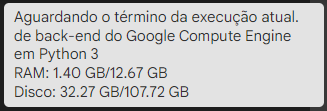



#<font color=lightgreen>Referência Bibliográfica

•	CORMEM, T. H., LEISERSON C. E., RIVEST R. L., STEIN C., Algoritmos Teoria e Prática – Gen LTC, 3ª Edição, 2012, ISBN-13: ‎ 978-8535236996

•	BACKES, A., Árvore AVL – Problema do Balanceamento (notas de aula), https://www.facom.ufu.br/~backes/gsi011/Aula11-ArvoreAVL.pdf

•	MARTINS, T., COZMAN, F. G., Árvores, Escola Politécnica da Universidade de São Paulo, https://edisciplinas.usp.br/pluginfile.php/3550215/mod_resource/content/1/arvores.pdf

•	BARBOSA D., Binary Tree in Python – Árvore Binária em Python Usando Classes (Repositório GitHub), https://gist.github.com/divanibarbosa/a8662693e44ab9ee0d0e8c2d74808929

•	DOWNEY A. et al., Cápitulo 20 Árvores – Aprenda Computação com Python 3.0, 2019, https://mange.ifrn.edu.br/python/aprenda-com-py3/capitulo_20.html

•	GHEEKS FOR GHEEKS, Trie Data Structure – Insert end Search, 2024, https://www.geeksforgeeks.org/trie-insert-and-search/

•	PORTELA J. F. R., Inserção, rotação e fator de balanceamento da árvore AVL explicados, Free Code Camp org, 2022, https://www.freecodecamp.org/portuguese/news/insercao-rotacao-e-fator-de-balanceamento-da-arvore-avl-explicados/

•	EDUARDO N. S. R., Implementação de Árvores AVL (Repositório GitHub), https://gist.github.com/vndmtrx/7657025

•	OSÓRIO V., Árvore AVL (Repositório GitHub), https://github.com/VORP2830/Arvore-AVL/blob/main/main.py

#<font color=lightgreen>Referência Áudio Visual:

•	BERTON L., Mundo das Adas, Vídeo Aula “Aula 08 Métodos de Pesquisa”,YouTube,https://www.youtube.com/watch?v=1XUGEMxUMwY

•	BERTON L., Mundo das Adas, Vídeo Aula “Aula 09 Árvore AVL”, YouTube, https://www.youtube.com/watch?v=vCG4pfaxFzQ

•	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 45 – Busca em Vetores)”, https://www.youtube.com/watch?v=ptvnLzqcJuA&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=47

•	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 68 – Árvores Propriedades”, https://www.youtube.com/watch?v=U7IiLJlMfnU&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=70

•	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 74 – Árvore Binária de Busca”, https://www.youtube.com/watch?v=M7cb4HjePJk&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=76

•	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 71 – Árvore Binária: Criando e Destruindo uma Árvore”, https://www.youtube.com/watch?v=QAJkoJW8bEc&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=72

•	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 75 – Inserção de Árvore Binária de Busca”, https://www.youtube.com/watch?v=8cdbmsPaR-k&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=76

•	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 77 – Consulta em Árvore Binária de Busca”, https://www.youtube.com/watch?v=mw_wqqB48yY&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=78

•	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 72 – Árvore Binária: Informações Básicas”, https://www.youtube.com/watch?v=qVnNdmx4fOA&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=73

•	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 79 – Árvore AVL Definição”, https://www.youtube.com/watch?v=4eO3UbTiRyo&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=80

•	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 81 – Árvore AVL Tipos de Rotação”, https://www.youtube.com/watch?v=1HkWqH7L2rU&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=82

•	BACKES A., Programação Descomplicada – Linguagem C, Video Aula “Estrutura de Dados em C | Aula 82 – Árvore AVL Implementando as Rotações”, https://www.youtube.com/watch?v=6OJ8stXwdq0&list=PL8iN9FQ7_jt6H5m4Gm0H89sybzR9yaaka&index=83
